In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'axes.labelcolor':'white', 'ytick.color':'white'});

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [3]:
## Pytorch tensors are very similear to numpy arrays
X = torch.Tensor([[1, 2, 3], [4, 5, 6]])
print (X, '\n')

## You can convert it into a numpy array
Xnp = X.detach().numpy()
print (type(Xnp),'\n', Xnp, '\n')

## You can also convert a numpy array to a pytorch tensor
X = torch.Tensor(Xnp)
print (type(X),'\n', X, '\n')


tensor([[1., 2., 3.],
        [4., 5., 6.]]) 

<class 'numpy.ndarray'> 
 [[1. 2. 3.]
 [4. 5. 6.]] 

<class 'torch.Tensor'> 
 tensor([[1., 2., 3.],
        [4., 5., 6.]]) 



In [4]:
## .cpu() is required when the tensor is stored on a GPU
## .detach() is required when the tensor is tracking gradient information
## The folloing code will NOT work without .detach().
tensor1 = torch.tensor([1.0,2.0], requires_grad=True, device=torch.device("cpu"))
tensor1 = tensor1.detach().numpy()

In [5]:
## requires_grad is by default set to False unless the tensor is a model parameter
print (X.requires_grad)

False


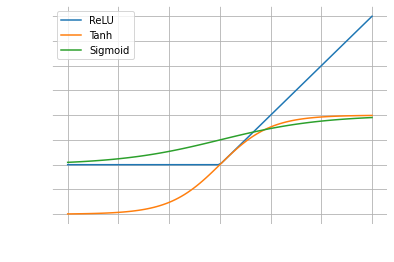

In [6]:
## the torch.nn module implements many useful functions
sigmoid = nn.Sigmoid()
relu = nn.ReLU()
tanh = nn.Tanh()

X = torch.linspace(-3, 3, 100)

plt.plot(X.numpy(), relu(X).numpy(), label='ReLU');
plt.plot(X.numpy(), tanh(X).numpy(), label='Tanh');
plt.plot(X.numpy(), sigmoid(X).numpy(), label='Sigmoid');
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left');
plt.show()

In [7]:
## the torch.nn module implements many useful functions: layers
n_samples = 5   ## Number of samples
n_in = 2        ## Number of features for each sample
n_out = 3       ## Number of outputs
fully_connected_layer = nn.Linear(n_in, n_out)

In [8]:

## the weights and bias of this layer is randomly initilized
## also notice that the requires_grad flag is set to True by default
print (fully_connected_layer.weight, '\n', fully_connected_layer.bias)
print ('\n')

Parameter containing:
tensor([[-0.5717, -0.4662],
        [ 0.6630,  0.4179],
        [ 0.5245, -0.4552]], requires_grad=True) 
 Parameter containing:
tensor([0.5245, 0.3565, 0.6859], requires_grad=True)




In [9]:
## The layer takes in the inputs arranged in rows and gives the outputs likewise
X = torch.Tensor(n_samples, n_in) # generate some random inputs
print (X.shape, '\n', X, '\n')

y = fully_connected_layer(X)
print (y.shape, '\n', y, '\n')

torch.Size([5, 2]) 
 tensor([[1.0500e-35, 0.0000e+00],
        [6.6298e-01, 4.1786e-01],
        [5.2446e-01, 4.5521e-01],
        [1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]]) 

torch.Size([5, 3]) 
 tensor([[ 0.5245,  0.3565,  0.6859],
        [-0.0494,  0.9706,  0.8434],
        [ 0.0124,  0.8944,  0.7537],
        [ 0.5245,  0.3565,  0.6859],
        [ 0.5245,  0.3565,  0.6859]], grad_fn=<AddmmBackward>) 



In [10]:
## We can also compose pytorch functions
softmax = nn.Softmax(dim=1)
y = softmax(fully_connected_layer(X))
print (y.shape, '\n', y, '\n')


torch.Size([5, 3]) 
 tensor([[0.2459, 0.5085, 0.2456],
        [0.3363, 0.4376, 0.2261],
        [0.3757, 0.4675, 0.1568],
        [0.2459, 0.5085, 0.2456],
        [0.2459, 0.5085, 0.2456]], grad_fn=<SoftmaxBackward>) 



In [10]:
# Create tensors of shape (5, 3) and (5, 2).
x = torch.randn(5, 3)
y = torch.randn(5, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[-0.5502,  0.3303, -0.2406],
        [-0.5599, -0.5639,  0.3294]], requires_grad=True)
b:  Parameter containing:
tensor([0.3769, 0.0657], requires_grad=True)
loss:  2.529284954071045
dL/dw:  tensor([[-0.7629,  0.4064, -1.4045],
        [ 0.1865, -1.7171, -0.1446]])
dL/db:  tensor([0.3161, 0.9210])
loss after 1 step optimization:  2.463136672973633


In [11]:
## nn.Module provides a template for a neural network architecture
class MyNeuralNet(nn.Module):
    def __init__(self, n_in, n_out):
        # invoke __init__() from the parent class
        super().__init__()

        # construct layers and activation function
        self.fc1 = nn.Linear(n_in, 100)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, n_out)
        self.sigmoid = nn.Sigmoid()
 
    
    def forward(self, inputs):

        # two hidden layers with sigmoid activation
        outputs = self.sigmoid(self.fc1(inputs))
        outputs = self.sigmoid(self.fc2(outputs))
        # the output layer is a fully connected layer without special activation
        outputs = self.fc3(outputs)

        return outputs

model = MyNeuralNet(n_in, n_out)
y = model(X)
print (y.shape)

torch.Size([5, 3])


## Pause for SGD lecture

In [13]:
## How do we randomly select a mini-batch from the dataset? Use pytorch dataloader!
## Let's show this on a randomly generated dataset.
from torch.utils.data import DataLoader

n_feature = 1
n_label = 1
N = 1000
N_train = 800
N_val = 200
X_data = 10 * (torch.rand(N, n_feature) - 0.5)
y_data = X_data * torch.cos(X_data) + torch.sin(X_data) ** 2 + 0.5*torch.rand(N, n_label)

In [25]:
#X_data and y_data are the dataset input and outputs

Xtrain=pd.DataFrame(X_data[:N_train,:].numpy())
Xtest=pd.DataFrame(X_data[N_train:,:].numpy())

Ytrain=pd.DataFrame(y_data[:N_train,:].numpy())
Ytest=pd.DataFrame(y_data[N_train:,:].numpy())

Xtrain.to_csv('x_train.csv',index=False)
Xtest.to_csv('x_test.csv',index=False)

Ytrain.to_csv('y_train.csv',index=False)
Ytest.to_csv('y_test.csv',index=False)

In [27]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self,inp_csv,label_csv):
      self.X_data=torch.Tensor(pd.read_csv(inp_csv).values)
      self.y_data=torch.Tensor(pd.read_csv(label_csv).values)

    def __getitem__(self, index):
      X = self.X_data[index]
      y = self.y_data[index]
      sample = {'X': X, 'y': y}
      return sample

    def __len__(self):
      return self.X_data.size()[0]

In [28]:
train_dataset=CustomDataset('x_train.csv','y_train.csv')
valid_dataset=CustomDataset('x_test.csv','y_test.csv')

In [29]:
dataloader_train = DataLoader(train_dataset, batch_size=50, shuffle=True)
dataloader_valid = DataLoader(valid_dataset, batch_size=200, shuffle=True)

dataloader_train_full_dataset = DataLoader(train_dataset, batch_size=800, shuffle=False)

for idx, sample in enumerate(dataloader_train):
    x = sample['X']
    y = sample['y']
    print (x.shape, y.shape)
    print ('\n')

torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 1]) torch.Size([50, 1])




## Pipeline

*   Define the dataloader
*   Define the model
*   Define the loss function to use
*   Define the optimization algorithm (for e.g., SGD)
*   For every minibatch:
        1.   Clear gradient information from previous iteration
        2.   Forward pass through the model and compute the loss
        3.   Backpropogate the error to compute the gradient update for each parameter
        4.   Update the parameters based on the optimization algorithm
*   At certain epoch intervals, evaluate loss over the whole training dataset


Here 1 epoch means we have iterated through the whole dataset once.









In [30]:
## That looks good. But how do we train NNs with SGD exactly?

# We need a model, a loss function and an optimizer!

model = MyNeuralNet(n_feature, n_label)
loss = nn.MSELoss(reduction='mean')
learning_rate = 1e-2
opt = optim.SGD(model.parameters(), lr=learning_rate)

# How many times should we go over the whole dataset?
epochs = 10000

# an empty list to collect the training loss
J_train_all = []

for i in range(epochs):
    for _, sample in enumerate(dataloader_train):
        # set model to training mode
        model.train()
        # clear gradients information from the previous iteration
        opt.zero_grad()
        # read out features and labels from the mini-batch
        x = sample['X']
        y = sample['y']

        # predict the labels using the model
        y_hat = model(x)
        # compute the loss 
        J = loss(y_hat, y)
        # compute the gradients
        J.backward()
        # update the parameters using the optimizer
        opt.step()

    # You might want to check the training loss from time to time...
    if i % 100 == 0:
        # set the model to evaluation mode
        model.eval()
        # we don't really need to compute the gradients here
        # so temporally turn it off to accelerate the computation
        for _, sample in enumerate(dataloader_train_full_dataset):
          with torch.no_grad():
            J_train = loss(model(sample['X']), sample['y'])
            J_train_all.append(J_train)
            print (J_train.numpy()) 
            # print() is ugly and slows down the code.
            # Pro tips: Google the tqdm library and learn how to show a nicer training progress bar!  

2.8587973
1.6232458
1.5743178
1.5474051
1.5354781
1.5420908
1.4893681
1.4589444
1.3439937
1.045675
0.72757345
0.75082093
0.5032976
0.32847324
0.223801
0.54065585
0.14263591
0.10886481
0.12771277
0.082812995
0.113879964
0.11081605
0.13922301
0.12047455
0.17498459
0.057826042
0.06478011
0.045820598
0.086898334
0.06655147
0.0620248
0.057011474
0.06904147
0.05135393
0.041064754
0.03633069
0.052026976
0.03455872
0.043388873
0.033042785
0.028397545
0.041264657
0.03023205
0.06482603
0.042795688
0.043456372
0.026684677
0.037032742
0.028441291
0.027252084
0.05540625
0.03157682
0.068325624
0.026621666
0.04021101
0.030762134
0.030713983
0.024078537
0.02682843
0.027045818
0.028104734
0.026501188
0.030300906
0.03125201
0.0333232
0.027071673
0.023568764
0.027347213
0.036345087
0.032790154
0.023497388
0.050495178
0.035294037
0.025369566
0.0345532
0.038159396
0.030931616
0.02846987
0.025756793
0.04217402
0.02801683
0.026621949
0.023386667
0.029594056
0.028846778
0.022982093
0.03518907
0.026667915
0.02

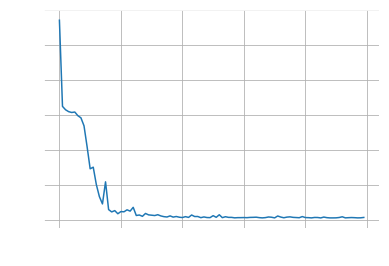

In [34]:
## Plot the loss curve

plt.plot(np.arange(0, epochs,100), J_train_all)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training loss');

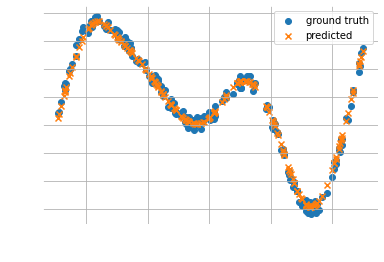

In [33]:
model.eval()
with torch.no_grad():
  for _, sample in enumerate(dataloader_valid):
    y_hat = model(sample['X'])
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(sample['X'].numpy(), sample['y'].numpy(), marker='o', label='ground truth')
    plt.scatter(sample['X'].numpy(), y_hat.numpy(), marker='x', label='predicted')
    plt.grid()
    plt.legend();